In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helpers import read_out, load_lins, get_input_output_lin, harmonic_timeseries

Load the data with sinusoidally-varying wind input, keeping just the last few cycles:

In [4]:
sinf_5ms_1rads = read_out("../runs/sinusoidal_just_tower_no_gen_dof/ws8.0/wind_8ms_5ms_1rads.out").loc[580:]
sinf_4ms_1rads = read_out("../runs/sinusoidal_just_tower_no_gen_dof/ws8.0/wind_8ms_4ms_1rads.out").loc[580:]
sinf_3ms_1rads = read_out("../runs/sinusoidal_just_tower_no_gen_dof/ws8.0/wind_8ms_3ms_1rads.out").loc[580:]
sinf_2ms_1rads = read_out("../runs/sinusoidal_just_tower_no_gen_dof/ws8.0/wind_8ms_2ms_1rads.out").loc[580:]
sinf_1ms_1rads = read_out("../runs/sinusoidal_just_tower_no_gen_dof/ws8.0/wind_8ms_1ms_1rads.out").loc[580:]
sinf_1ms_01rads = read_out("../runs/sinusoidal_just_tower_no_gen_dof/ws8.0/wind_8ms_1ms_0.1rads.out").loc[500:]
sinf_01ms_01rads = read_out("../runs/sinusoidal_just_tower_no_gen_dof/ws8.0/wind_8ms_0.1ms_0.1rads.out").loc[500:]

In [5]:
sin_5ms_1rads = read_out("../runs/sinusoidal_just_tower/ws8.0/wind_8ms_5ms_1rads.out").loc[580:]
sin_4ms_1rads = read_out("../runs/sinusoidal_just_tower/ws8.0/wind_8ms_4ms_1rads.out").loc[580:]
sin_3ms_1rads = read_out("../runs/sinusoidal_just_tower/ws8.0/wind_8ms_3ms_1rads.out").loc[580:]
sin_2ms_1rads = read_out("../runs/sinusoidal_just_tower/ws8.0/wind_8ms_2ms_1rads.out").loc[580:]
sin_1ms_1rads = read_out("../runs/sinusoidal_just_tower/ws8.0/wind_8ms_1ms_1rads.out").loc[580:]
sin_1ms_01rads = read_out("../runs/sinusoidal_just_tower/ws8.0/wind_8ms_1ms_0.1rads.out").loc[500:]
sin_01ms_01rads = read_out("../runs/sinusoidal_just_tower/ws8.0/wind_8ms_0.1ms_0.1rads.out").loc[500:]

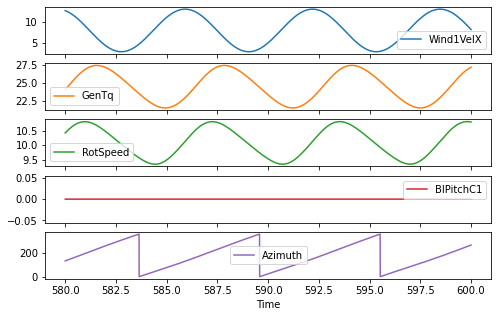

In [6]:
sin_5ms_1rads[["Wind1VelX", "GenTq", "RotSpeed", "BlPitchC1", "Azimuth"]].plot(subplots=True, figsize=(8, 5));

Load the linearised data corresponding to this operating point (8m/s mean wind, constant generator torque as above). There are two variants, linearised assuming "frozen" or "equilibrium" wake (but they give very similar results).

In [11]:
lins = load_lins("linearised", [8.0], "trim_none")
lins_equilib = load_lins("linearised", [8.0], "trim_none_equilib")
lins_no_gen_dof = load_lins("linearised", [8.0], "trim_none_no_gen_dof")
lins_no_gen_dof_no_tower = load_lins("linearised", [8.0], "trim_none_no_gen_dof_no_tower")

Check that the linearisation conditions match up:

In [12]:
sins = [sin_2ms_1rads, sin_1ms_1rads, sin_1ms_01rads, sin_01ms_01rads]
for s in sins:
    print(f"{s['RotSpeed'].mean():.3f} rpm, {s['Wind1VelX'].mean():.3f} m/s")

9.315 rpm, 8.063 m/s
9.202 rpm, 8.032 m/s
9.414 rpm, 8.192 m/s
9.175 rpm, 8.019 m/s


In [13]:
print(f"Lin {lins['RotSpeed'].mean()*30/np.pi:.3f} rpm, {lins['WindSpeed'].mean():.3f} m/s")

Lin 9.098 rpm, 8.000 m/s


In [14]:
print(f"Lin {lins_no_gen_dof['RotSpeed'].mean()*30/np.pi:.3f} rpm, {lins_no_gen_dof['WindSpeed'].mean():.3f} m/s")

Lin 9.089 rpm, 8.000 m/s


In [15]:
print(f"Lin {lins_no_gen_dof_no_tower['RotSpeed'].mean()*30/np.pi:.3f} rpm, {lins_no_gen_dof_no_tower['WindSpeed'].mean():.3f} m/s")

Lin 9.089 rpm, 8.000 m/s


Now let's extract the linearisation coefficients -- these are the indices of the relevant variables:

In [16]:
ix_gen = 1
ix_gen_vel = 3
iu_wind = 0
iy_rotthrust_servo = 20
iy_rotspeed_servo = 11
iy_ttdfa = 13

In [17]:
print(lins.iloc[0]["x_info"]["Description"][ix_gen])
print(lins.iloc[0]["x_info"]["Description"][ix_gen_vel])
print(lins.iloc[0]["u_info"]["Description"][iu_wind])
print(lins.iloc[0]["y_info"]["Description"][iy_rotthrust_servo])
print(lins.iloc[0]["y_info"]["Description"][iy_rotspeed_servo])
print(lins.iloc[0]["y_info"]["Description"][iy_ttdfa])

ED Variable speed generator DOF (internal DOF index = DOF_GeAz), rad
ED First time derivative of Variable speed generator DOF (internal DOF index = DOF_GeAz), rad/s
IfW Extended input: horizontal wind speed (steady/uniform wind), m/s
ED RotThrust, (kN)
ED RotSpeed, (rpm)
ED TTDspFA, (m)


In [18]:
# No Gen DOF -- print(lins_no_gen_dof.iloc[0]["x_info"]["Description"][ix_gen])
# No Gen DOF -- print(lins_no_gen_dof.iloc[0]["x_info"]["Description"][ix_gen_vel])
print(lins_no_gen_dof.iloc[0]["u_info"]["Description"][iu_wind])
print(lins_no_gen_dof.iloc[0]["y_info"]["Description"][iy_rotthrust_servo])
print(lins_no_gen_dof.iloc[0]["y_info"]["Description"][iy_rotspeed_servo])

IfW Extended input: horizontal wind speed (steady/uniform wind), m/s
ED RotThrust, (kN)
ED RotSpeed, (rpm)


In [19]:
# No Gen DOF -- print(lins_no_gen_dof.iloc[0]["x_info"]["Description"][ix_gen])
# No Gen DOF -- print(lins_no_gen_dof.iloc[0]["x_info"]["Description"][ix_gen_vel])
print(lins_no_gen_dof_no_tower.iloc[0]["u_info"]["Description"][iu_wind])
print(lins_no_gen_dof_no_tower.iloc[0]["y_info"]["Description"][iy_rotthrust_servo])
print(lins_no_gen_dof_no_tower.iloc[0]["y_info"]["Description"][iy_rotspeed_servo])

IfW Extended input: horizontal wind speed (steady/uniform wind), m/s
ED RotThrust, (kN)
ED RotSpeed, (rpm)


In [21]:
F0, dF = get_input_output_lin(lins, iu_wind, iy_rotthrust_servo)
F0[8.0], dF[8.0]

(473.8569259645, 48.562600409125)

With equilibrium wake instead of frozen wake, it doesn't make much difference:

In [22]:
F0e, dFe = get_input_output_lin(lins_equilib, iu_wind, iy_rotthrust_servo)
F0e[8.0], dFe[8.0]

(473.8569259645, 46.68065455318334)

And with the fixed rotor speed:

In [23]:
F0f, dFf = get_input_output_lin(lins_no_gen_dof, iu_wind, iy_rotthrust_servo)
F0f[8.0], dFf[8.0]

(473.6217803955, 48.463935853950005)

In [24]:
F0ff, dFff = get_input_output_lin(lins_no_gen_dof_no_tower, iu_wind, iy_rotthrust_servo)
F0ff[8.0], dFff[8.0]

(469.6122843423334, 66.83148665487501)

The linearisation doesn't include the effect of wind speed on increasing rotor speed?

In [25]:
Omega0, dOmega = get_input_output_lin(lins_equilib, iu_wind, iy_rotspeed_servo)
dOmega[8.0]

0.0

Or what about the generator state?

In [26]:
get_input_output_lin(lins_equilib, iu_wind, ix_gen_vel, matrix="B")[1][8.0]

0.016166105172983333

However, this is just using the single coefficient from wind speed to thrust -- in fact there are additional states in the model that can be considered.

## Full harmonic solution

I'm not sure how to deal with the periodic operating point and harmonic solution -- I want to allow for perturbations in rotor speed, but the state in the linearised model is *generator azimuth*. It doesn't make sense to say that variations in azimuth are harmonic; instead it's variations in *generator speed* which are harmonic.

In the below I am dropping the generator azimuth as a state, but I'm not sure this is correct.

In [90]:
# Use the equilibrium wake linearisation (doesn't make much difference)
lins = lins_equilib

In [91]:
# Get the linearised state-space matrices, dropping the generator azimuth state (idx 1)
x_idx = [0, 2, 3]
A = np.stack(lins["A"]).mean(axis=0)[x_idx, x_idx]
B = np.stack(lins["B"]).mean(axis=0)[x_idx, :]
C = np.stack(lins["C"]).mean(axis=0)[:, x_idx]
D = np.stack(lins["D"]).mean(axis=0)

Operating point

In [92]:
x0 = np.stack(lins["x"]).mean(axis=0)[x_idx]
u0 = np.stack(lins["u"]).mean(axis=0)
y0 = np.stack(lins["y"]).mean(axis=0)

We will solve the linearised state-space model assuming harmonic variations in inputs $u$, states $x$ and outputs $y$ at frequency $\omega$:

\begin{align}
x &= X e^{i \omega t} \\
u &= U e^{i \omega t} \\
y &= Y e^{i \omega t}
\end{align}

Substituting this into the state-space equations gives:

\begin{align}
i \omega X &= A X + B U \\
Y &= C X + D U
\end{align}

which can be solved for $X$ as

\begin{align}
X &= \left( i \omega I - A \right)^{-1} B U
\end{align}

In [93]:
from numpy import linalg
def harmonic_solution(w, U):
    """Solve the linearised state-space model given harmonic input U."""
    X = linalg.solve(1j * w * np.eye(A.shape[0]) - A, np.dot(B, U))
    Y = np.dot(C, X) + np.dot(D, U)
    return X, Y

In [94]:
# Harmonic input
U = np.zeros(B.shape[1])
U[iu_wind] = 1
w = 1  # rad/s

Solve for states

In [95]:
X, Y = harmonic_solution(w, U)

In [96]:
t, xx = harmonic_timeseries(w, X)
t, yy = harmonic_timeseries(w, Y)
t, uu = harmonic_timeseries(w, U)

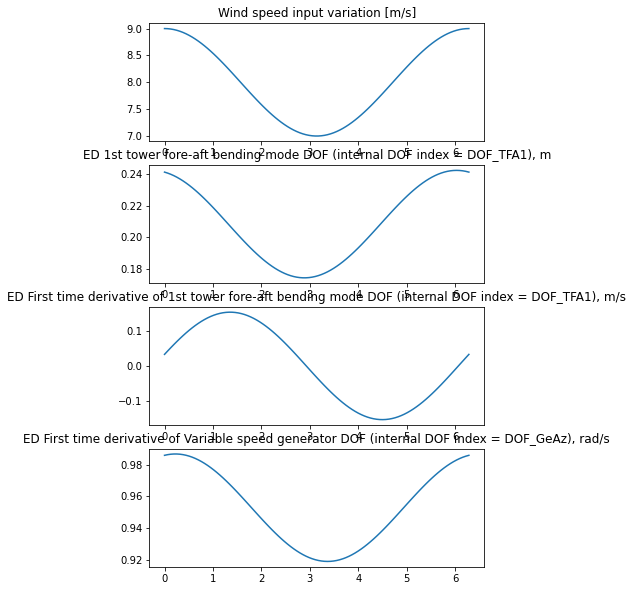

In [97]:
fig, ax = plt.subplots(1 + len(x0), figsize=(6, 10))
ax[0].plot(t, 8 + uu[iu_wind])
ax[0].set_title("Wind speed input variation [m/s]")
for i in range(len(x0)):
    ax[1+i].plot(t, x0[i] + xx[i])
    ax[1+i].set_title(lins.iloc[0]["x_info"]["Description"][x_idx[i]])

In [98]:
def plot_comparison_vs_rotor_speed_full(sin, dU, w, title="", ax=None):
    U = np.zeros(B.shape[1])
    U[iu_wind] = dU
    _, Y = harmonic_solution(w, U)
    t, yy = harmonic_timeseries(w, Y)
    _, uu = harmonic_timeseries(w, U)
    w0 = 8.0
    
    if ax is None:
        fig, ax = plt.subplots(3, 1, sharex=True, figsize=(5, 9))
    ax[0].plot(sin["Wind1VelX"], sin["RotThrust"], 'k')
    ax[0].plot(w0 + uu[iu_wind],
               y0[iy_rotthrust_servo] + yy[iy_rotthrust_servo], 'C1')
    ax[0].plot([w0], [y0[iy_rotthrust_servo]], 'o', color='C1')
    ax[0].set_ylabel("RotThrust")
    ax[0].set_title(title)
    
    ax[1].plot(sin["Wind1VelX"], sin["RotSpeed"], 'k')
    ax[1].plot(w0 + uu[iu_wind],
               y0[iy_rotspeed_servo] + yy[iy_rotspeed_servo], 'C1')
    ax[1].plot([w0], [y0[iy_rotspeed_servo]], 'o', color='C1')
    ax[1].set_ylabel("RotSpeed")
    
    ax[2].plot(sin["Wind1VelX"], sin["TTDspFA"], 'k')
    ax[2].plot(w0 + uu[iu_wind],
               y0[iy_ttdfa] + yy[iy_ttdfa], 'C1')
    ax[2].plot([w0], [y0[iy_ttdfa]], 'o', color='C1')
    ax[2].set_ylabel("TTD FA")

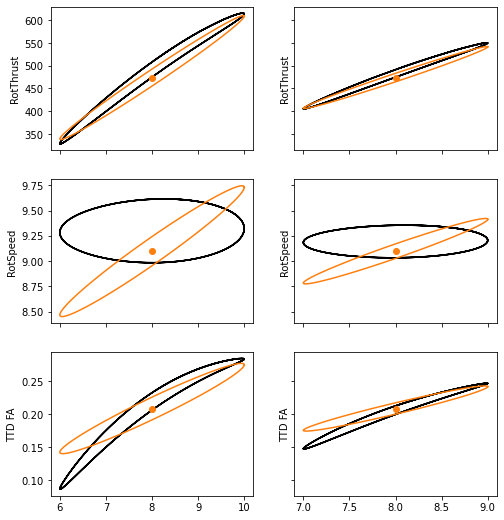

In [99]:
fig, ax = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(8, 9))
plot_comparison_vs_rotor_speed_full(sin_2ms_1rads, 2.0, 1.0, ax=ax[:, 0])
plot_comparison_vs_rotor_speed_full(sin_1ms_1rads, 1.0, 1.0, ax=ax[:, 1])

Here `RotThrust` is the rotor thrust force in kN, `RotSpeed` is the rotor speed in rpm, and `TTD FA` is the Tower-Top Deflection (Fore-Aft).

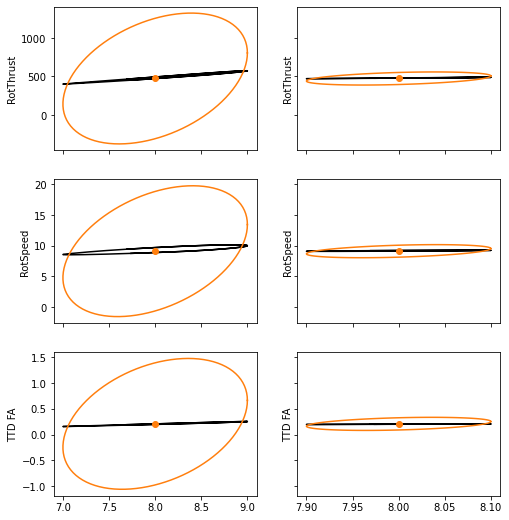

In [66]:
fig, ax = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(8, 9))
plot_comparison_vs_rotor_speed_full(sin_1ms_01rads, 1.0, 0.1, ax=ax[:, 0])
plot_comparison_vs_rotor_speed_full(sin_01ms_01rads, 0.1, 0.1, ax=ax[:, 1])

## Full harmonic solution -- fixed speed linearisation

Let's do the same thing now but with the generator speed fixed to make things simpler:

In [78]:
x_idx = [0, 1]  # reset to include all DOFs
A = np.stack(lins_no_gen_dof["A"]).mean(axis=0)
B = np.stack(lins_no_gen_dof["B"]).mean(axis=0)
C = np.stack(lins_no_gen_dof["C"]).mean(axis=0)
D = np.stack(lins_no_gen_dof["D"]).mean(axis=0)

Operating point

In [79]:
x0 = np.stack(lins_no_gen_dof["x"]).mean(axis=0)
u0 = np.stack(lins_no_gen_dof["u"]).mean(axis=0)
y0 = np.stack(lins_no_gen_dof["y"]).mean(axis=0)

In [81]:
# Harmonic input
U = np.zeros(B.shape[1])
U[iu_wind] = 1

At a frequency of 1 rad/s:

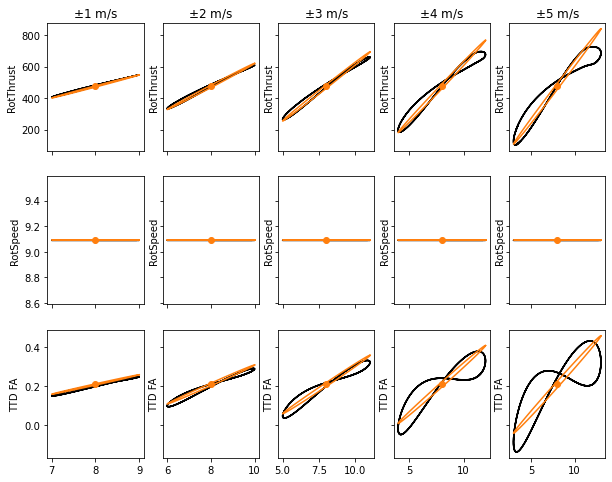

In [75]:
fig, ax = plt.subplots(3, 5, sharex='col', sharey='row', figsize=(10, 8))
plot_comparison_vs_rotor_speed_full(sinf_1ms_1rads, 1.0, 1.0, "$\pm$1 m/s", ax=ax[:, 0])
plot_comparison_vs_rotor_speed_full(sinf_2ms_1rads, 2.0, 1.0, "$\pm$2 m/s", ax=ax[:, 1])
plot_comparison_vs_rotor_speed_full(sinf_3ms_1rads, 3.0, 1.0, "$\pm$3 m/s", ax=ax[:, 2])
plot_comparison_vs_rotor_speed_full(sinf_4ms_1rads, 4.0, 1.0, "$\pm$4 m/s", ax=ax[:, 3])
plot_comparison_vs_rotor_speed_full(sinf_5ms_1rads, 5.0, 1.0, "$\pm$5 m/s", ax=ax[:, 4])

At a frequency of 0.1 rad/s:

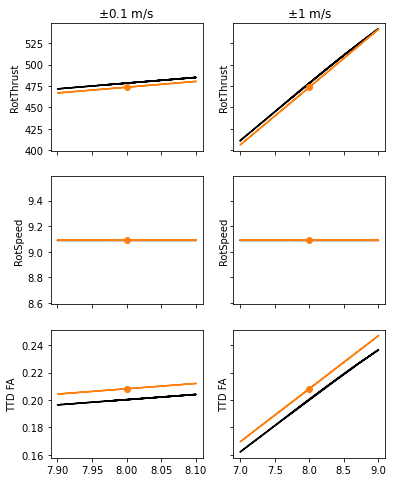

In [76]:
fig, ax = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(6, 8))
plot_comparison_vs_rotor_speed_full(sinf_01ms_01rads, 0.1, 0.1, "$\pm$0.1 m/s", ax=ax[:, 0])
plot_comparison_vs_rotor_speed_full(sinf_1ms_01rads,  1.0, 0.1, "$\pm$1 m/s", ax=ax[:, 1])

## Full harmonic solution -- fixed speed linearisation, no tower

Now let's simplify further by neglecting the tower deflection:

**TODO** Haven't run the non-linear simulations for this case...

In [83]:
A = np.zeros((0, 0))
B = np.zeros((0, len(lins_no_gen_dof_no_tower.iloc[0]["u"])))
C = np.zeros((len(lins_no_gen_dof_no_tower.iloc[0]["y"]), 0))
D = np.stack(lins_no_gen_dof_no_tower["D"]).mean(axis=0)

In [85]:
x0 = np.empty((0,))
u0 = np.empty((0,))
y0 = np.stack(lins_no_gen_dof_no_tower["y"]).mean(axis=0)

In [86]:
# Harmonic input
U = np.zeros(B.shape[1])
U[iu_wind] = 1

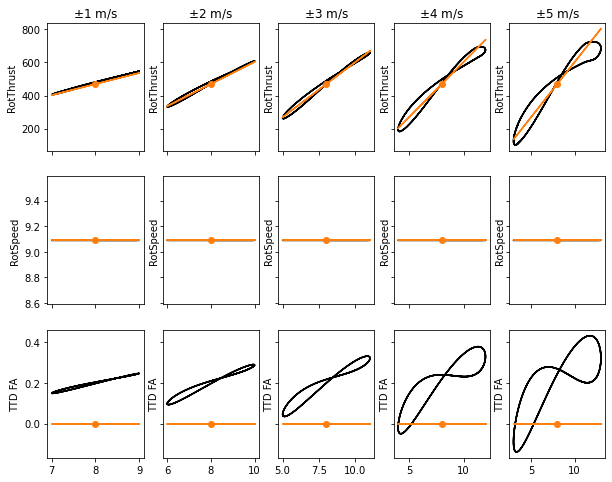

In [87]:
fig, ax = plt.subplots(3, 5, sharex='col', sharey='row', figsize=(10, 8))
plot_comparison_vs_rotor_speed_full(sinf_1ms_1rads, 1.0, 1.0, "$\pm$1 m/s", ax=ax[:, 0])
plot_comparison_vs_rotor_speed_full(sinf_2ms_1rads, 2.0, 1.0, "$\pm$2 m/s", ax=ax[:, 1])
plot_comparison_vs_rotor_speed_full(sinf_3ms_1rads, 3.0, 1.0, "$\pm$3 m/s", ax=ax[:, 2])
plot_comparison_vs_rotor_speed_full(sinf_4ms_1rads, 4.0, 1.0, "$\pm$4 m/s", ax=ax[:, 3])
plot_comparison_vs_rotor_speed_full(sinf_5ms_1rads, 5.0, 1.0, "$\pm$5 m/s", ax=ax[:, 4])

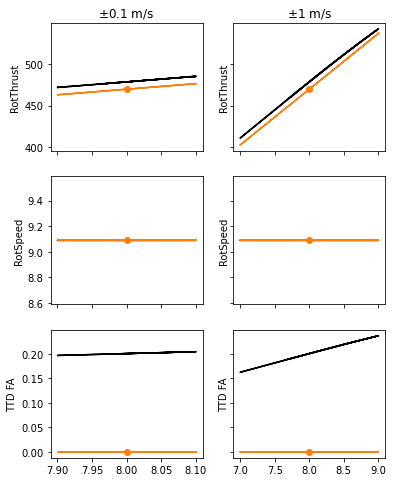

In [88]:
fig, ax = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(6, 8))
plot_comparison_vs_rotor_speed_full(sinf_01ms_01rads, 0.1, 0.1, "$\pm$0.1 m/s", ax=ax[:, 0])
plot_comparison_vs_rotor_speed_full(sinf_1ms_01rads,  1.0, 0.1, "$\pm$1 m/s", ax=ax[:, 1])